In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
from imblearn.over_sampling import SMOTE


In [2]:
dataset = pd.read_csv('CreditCardUpdated.csv')

In [3]:
dataset

,limit_bal,sex,education,marriage,age,pay_sep,pay_aug,pay_july,pay_june,pay_may,pay_apr,bill_amt_sep,bill_amt_aug,bill_amt_july,bill_amt_june,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_apr,default
0,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,0,0,0,0,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,0,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,0,0,0,0,0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [4]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [5]:
x.shape

(30000, 23)

In [6]:
y.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [7]:
smk = SMOTE(random_state=42)
x_res,y_res = smk.fit_resample(x,y)
x_res.shape,y_res.shape

((46728, 23), (46728,))

In [8]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 23364, 1: 6636})
Resampled dataset shape Counter({1: 23364, 0: 23364})


In [9]:
dataset

,limit_bal,sex,education,marriage,age,pay_sep,pay_aug,pay_july,pay_june,pay_may,pay_apr,bill_amt_sep,bill_amt_aug,bill_amt_july,bill_amt_june,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_apr,default
0,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,0,0,0,0,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,0,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,0,0,0,0,0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [10]:
x_res

,limit_bal,sex,education,marriage,age,pay_sep,pay_aug,pay_july,pay_june,pay_may,pay_apr,bill_amt_sep,bill_amt_aug,bill_amt_july,bill_amt_june,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_apr
0,20000.000000,2,2,1,24,2,2,0,0,0,0,3913.000000,3102.000000,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000
1,120000.000000,2,2,2,26,0,2,0,0,0,2,2682.000000,1725.000000,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000
2,90000.000000,2,2,2,34,0,0,0,0,0,0,29239.000000,14027.000000,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000
3,50000.000000,2,2,1,37,0,0,0,0,0,0,46990.000000,48233.000000,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000
4,50000.000000,1,2,1,57,0,0,0,0,0,0,8617.000000,5670.000000,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,462164.268649,1,1,1,41,1,1,3,3,3,3,2688.269190,2249.139081,3610.680489,3401.179283,2375.315944,1955.014972,294.124109,1655.665516,1446.164311,420.300972,0.000000,1270.425697
46724,35576.497730,1,1,2,23,0,0,0,0,0,0,29694.345994,28646.618035,16550.609104,12672.613622,7794.437831,4339.875461,724.944705,1759.975670,620.240505,304.412443,342.084239,154.468987
46725,262277.075863,1,1,1,33,1,1,1,1,1,1,155844.179310,164066.687603,163884.824773,176985.751580,179204.686146,183003.869208,11316.877241,2864.651035,16945.592209,6132.419972,6201.990069,6045.222621
46726,278870.779545,1,2,1,38,0,0,0,0,0,0,1889.919601,3536.561110,5322.062749,5259.299131,4093.989610,3481.169948,3575.431889,5368.352620,5285.282833,4113.892986,3497.831182,3121.627322


In [11]:
y_res = pd.DataFrame(y_res)

In [12]:
x_res['default'] = y_res

In [13]:
x_res

,limit_bal,sex,education,marriage,age,pay_sep,pay_aug,pay_july,pay_june,pay_may,pay_apr,bill_amt_sep,bill_amt_aug,bill_amt_july,bill_amt_june,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_apr,default
0,20000.000000,2,2,1,24,2,2,0,0,0,0,3913.000000,3102.000000,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1
1,120000.000000,2,2,2,26,0,2,0,0,0,2,2682.000000,1725.000000,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1
2,90000.000000,2,2,2,34,0,0,0,0,0,0,29239.000000,14027.000000,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0
3,50000.000000,2,2,1,37,0,0,0,0,0,0,46990.000000,48233.000000,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0
4,50000.000000,1,2,1,57,0,0,0,0,0,0,8617.000000,5670.000000,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,462164.268649,1,1,1,41,1,1,3,3,3,3,2688.269190,2249.139081,3610.680489,3401.179283,2375.315944,1955.014972,294.124109,1655.665516,1446.164311,420.300972,0.000000,1270.425697,1
46724,35576.497730,1,1,2,23,0,0,0,0,0,0,29694.345994,28646.618035,16550.609104,12672.613622,7794.437831,4339.875461,724.944705,1759.975670,620.240505,304.412443,342.084239,154.468987,1
46725,262277.075863,1,1,1,33,1,1,1,1,1,1,155844.179310,164066.687603,163884.824773,176985.751580,179204.686146,183003.869208,11316.877241,2864.651035,16945.592209,6132.419972,6201.990069,6045.222621,1
46726,278870.779545,1,2,1,38,0,0,0,0,0,0,1889.919601,3536.561110,5322.062749,5259.299131,4093.989610,3481.169948,3575.431889,5368.352620,5285.282833,4113.892986,3497.831182,3121.627322,1


In [14]:
data = x_res.copy()

c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default', ylabel='count'>

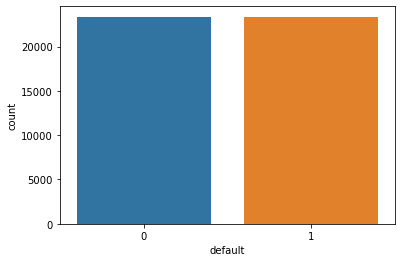

In [15]:
sns.countplot(data['default'])

In [16]:
data.head()

,limit_bal,sex,education,marriage,age,pay_sep,pay_aug,pay_july,pay_june,pay_may,pay_apr,bill_amt_sep,bill_amt_aug,bill_amt_july,bill_amt_june,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_apr,default
0,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Label Encoding for sex column.

In [17]:
data['sex'].value_counts() # (1=male, 2=female)

2    23713
1    23015
Name: sex, dtype: int64

### We will replace 2 i.e female with 0.

In [18]:
data['sex'].replace({2:0},inplace=True)

In [19]:
data['sex'].value_counts()

0    23713
1    23015
Name: sex, dtype: int64

In [20]:
data.head()

,limit_bal,sex,education,marriage,age,pay_sep,pay_aug,pay_july,pay_june,pay_may,pay_apr,bill_amt_sep,bill_amt_aug,bill_amt_july,bill_amt_june,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_apr,default
0,20000.0,0,2,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,0,2,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,0,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,0,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### We will do one hot encoding for education column.

In [21]:
data['education'].value_counts()  # (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

2    22788
1    17775
3     5697
4      468
Name: education, dtype: int64

In [22]:
data = pd.get_dummies(data,columns=['education'],prefix=['edu'])

In [23]:
data.head()

,limit_bal,sex,marriage,age,pay_sep,pay_aug,pay_july,pay_june,pay_may,pay_apr,bill_amt_sep,bill_amt_aug,bill_amt_july,bill_amt_june,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_apr,default,edu_1,edu_2,edu_3,edu_4
0,20000.0,0,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0,1,0,0
1,120000.0,0,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,1,0,0
2,90000.0,0,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,1,0,0
3,50000.0,0,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,1,0,0
4,50000.0,1,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,1,0,0


### We will do one hot encoding for marriage column.

In [24]:
data = pd.get_dummies(data,columns=['marriage'],prefix=['mar'])

In [25]:
data.head()

,limit_bal,sex,age,pay_sep,pay_aug,pay_july,pay_june,pay_may,pay_apr,bill_amt_sep,bill_amt_aug,bill_amt_july,bill_amt_june,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_apr,default,edu_1,edu_2,edu_3,edu_4,mar_1,mar_2,mar_3
0,20000.0,0,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0,1,0,0,1,0,0
1,120000.0,0,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,1,0,0,0,1,0
2,90000.0,0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,1,0,0,0,1,0
3,50000.0,0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,1,0,0,1,0,0
4,50000.0,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,1,0,0,1,0,0


In [26]:
# payment_status = data[['pay_sep','pay_aug','pay_july','pay_june','pay_may','pay_apr']]

In [27]:
data = pd.get_dummies(data,columns=['pay_sep'],prefix=['pay_sep'])

In [28]:
data = pd.get_dummies(data,columns=['pay_aug'],prefix=['pay_aug'])

In [29]:
data = pd.get_dummies(data,columns=['pay_july'],prefix=['pay_july'])

In [30]:
data = pd.get_dummies(data,columns=['pay_june'],prefix=['pay_june'])

In [31]:
data = pd.get_dummies(data,columns=['pay_may'],prefix=['pay_may'])

In [32]:
data = pd.get_dummies(data,columns=['pay_apr'],prefix=['pay_apr'])

In [33]:
data

,limit_bal,sex,age,bill_amt_sep,bill_amt_aug,bill_amt_july,bill_amt_june,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_apr,default,edu_1,edu_2,edu_3,edu_4,mar_1,mar_2,mar_3,pay_sep_0,pay_sep_1,pay_sep_2,pay_sep_3,pay_sep_4,pay_sep_5,pay_sep_6,pay_sep_7,pay_sep_8,pay_aug_0,pay_aug_1,pay_aug_2,pay_aug_3,pay_aug_4,pay_aug_5,pay_aug_6,pay_aug_7,pay_aug_8,pay_july_0,pay_july_1,pay_july_2,pay_july_3,pay_july_4,pay_july_5,pay_july_6,pay_july_7,pay_july_8,pay_june_0,pay_june_1,pay_june_2,pay_june_3,pay_june_4,pay_june_5,pay_june_6,pay_june_7,pay_june_8,pay_may_0,pay_may_1,pay_may_2,pay_may_3,pay_may_4,pay_may_5,pay_may_6,pay_may_7,pay_may_8,pay_apr_0,pay_apr_1,pay_apr_2,pay_apr_3,pay_apr_4,pay_apr_5,pay_apr_6,pay_apr_7,pay_apr_8
0,20000.000000,0,24,3913.000000,3102.000000,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,120000.000000,0,26,2682.000000,1725.000000,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,90000.000000,0,34,29239.000000,14027.000000,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,50000.000000,0,37,46990.000000,48233.000000,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,50000.000000,1,57,8617.000000,5670.000000,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,462164.268649,1,41,2688.269190,2249.139081,3610.680489,3401.179283,2375.315944,1955.014972,294.124109,1655.665516,1446.164311,420.300972,0.000000,1270.425697,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
46724,35576.497730,1,23,29694.345994,28646.618035,16550.609104,12672.613622,7794.437831,4339.875461,724.944705,1759.975670,620.240505,304.412443,342.084239,154.468987,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
46725,262277.075863,1,33,155844.179310,164066.687603,163884.824773,176985.751580,179204.686146,183003.869208,11316.877241,2864.651035,16945.592209,6132.419972,6201.990069,6045.222621,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
46726,278870.779545,1,38,1889.919601,3536.561110,5322.062749,5259.299131,4093.989610,3481.169948,3575.431889,5368.352620,5285.282833,4113.892986,3497.831182,3121.627322,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [34]:
data.to_csv('D:/INEURON/ML/END TO END PROJECT/2 FEATURE ENGINEERING/CreditCardfinal.csv',index=False)

In [35]:
pd.read_csv('CreditCardfinal.csv')

,limit_bal,sex,age,bill_amt_sep,bill_amt_aug,bill_amt_july,bill_amt_june,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_apr,default,edu_1,edu_2,edu_3,edu_4,mar_1,mar_2,mar_3,pay_sep_0,pay_sep_1,pay_sep_2,pay_sep_3,pay_sep_4,pay_sep_5,pay_sep_6,pay_sep_7,pay_sep_8,pay_aug_0,pay_aug_1,pay_aug_2,pay_aug_3,pay_aug_4,pay_aug_5,pay_aug_6,pay_aug_7,pay_aug_8,pay_july_0,pay_july_1,pay_july_2,pay_july_3,pay_july_4,pay_july_5,pay_july_6,pay_july_7,pay_july_8,pay_june_0,pay_june_1,pay_june_2,pay_june_3,pay_june_4,pay_june_5,pay_june_6,pay_june_7,pay_june_8,pay_may_0,pay_may_1,pay_may_2,pay_may_3,pay_may_4,pay_may_5,pay_may_6,pay_may_7,pay_may_8,pay_apr_0,pay_apr_1,pay_apr_2,pay_apr_3,pay_apr_4,pay_apr_5,pay_apr_6,pay_apr_7,pay_apr_8
0,20000.000000,0,24,3913.000000,3102.000000,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,120000.000000,0,26,2682.000000,1725.000000,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,90000.000000,0,34,29239.000000,14027.000000,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,50000.000000,0,37,46990.000000,48233.000000,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,50000.000000,1,57,8617.000000,5670.000000,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,462164.268649,1,41,2688.269190,2249.139081,3610.680489,3401.179283,2375.315944,1955.014972,294.124109,1655.665516,1446.164311,420.300972,0.000000,1270.425697,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
46724,35576.497730,1,23,29694.345994,28646.618035,16550.609104,12672.613622,7794.437831,4339.875461,724.944705,1759.975670,620.240505,304.412443,342.084239,154.468987,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
46725,262277.075863,1,33,155844.179310,164066.687603,163884.824773,176985.751580,179204.686146,183003.869208,11316.877241,2864.651035,16945.592209,6132.419972,6201.990069,6045.222621,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
46726,278870.779545,1,38,1889.919601,3536.561110,5322.062749,5259.299131,4093.989610,3481.169948,3575.431889,5368.352620,5285.282833,4113.892986,3497.831182,3121.627322,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
